In [1]:
%cd ..

d:\work\ADASVehicleTracking


In [2]:
from GMM.coarse_clustering import run_GMM_clustering
from utils import props, show_image, get_cluster_images_separated, save_image_cmap

In [3]:
import numpy as np

In [4]:
filename = 'D:\work\ADASVehicleTracking\Data\DSC_1643.jpg'

In [5]:
gmm_image = run_GMM_clustering(image_path = filename, k = 2)

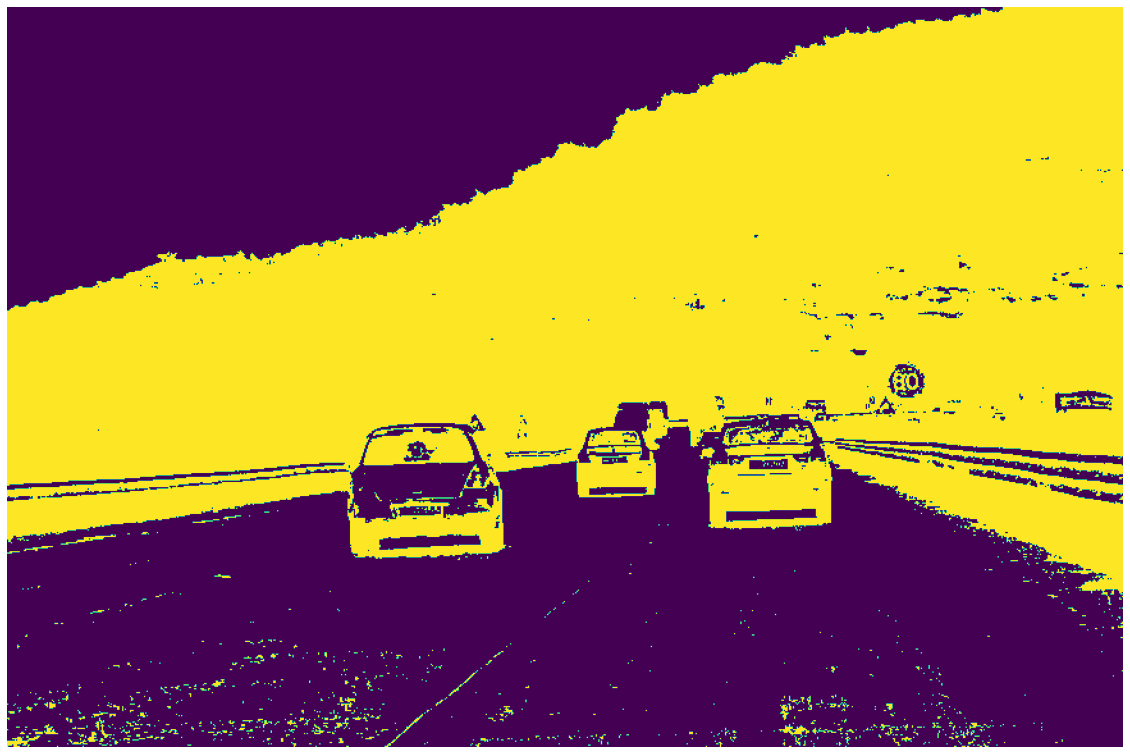

In [6]:
show_image(gmm_image, title = "GMM_image_k_2")

In [7]:
save_image_cmap(image = gmm_image, title = "GMM_image_k_2");
props(gmm_image, show_uniques=True)

Shape : (578, 872, 1) Maximum : 1 Minimum : 0 Data Type : uint8
Uniques : [0 1]


In [8]:
all_GMM_clustered_images = get_cluster_images_separated(gmm_image, save = True, prepend_save = "GMM_image_k2_");

In [9]:
from CCL.fine_clustering import run_CCL_clustering

In [10]:
len(all_GMM_clustered_images)

2

In [11]:
all_CCL_clustered_images = list(map(lambda x: run_CCL_clustering(img_data = np.squeeze(x), convert_BGR2RGB=False), all_GMM_clustered_images))

In [12]:
len(all_CCL_clustered_images)

2

In [13]:
props(all_CCL_clustered_images[0])

Shape : (578, 872) Maximum : 885 Minimum : 0 Data Type : int32


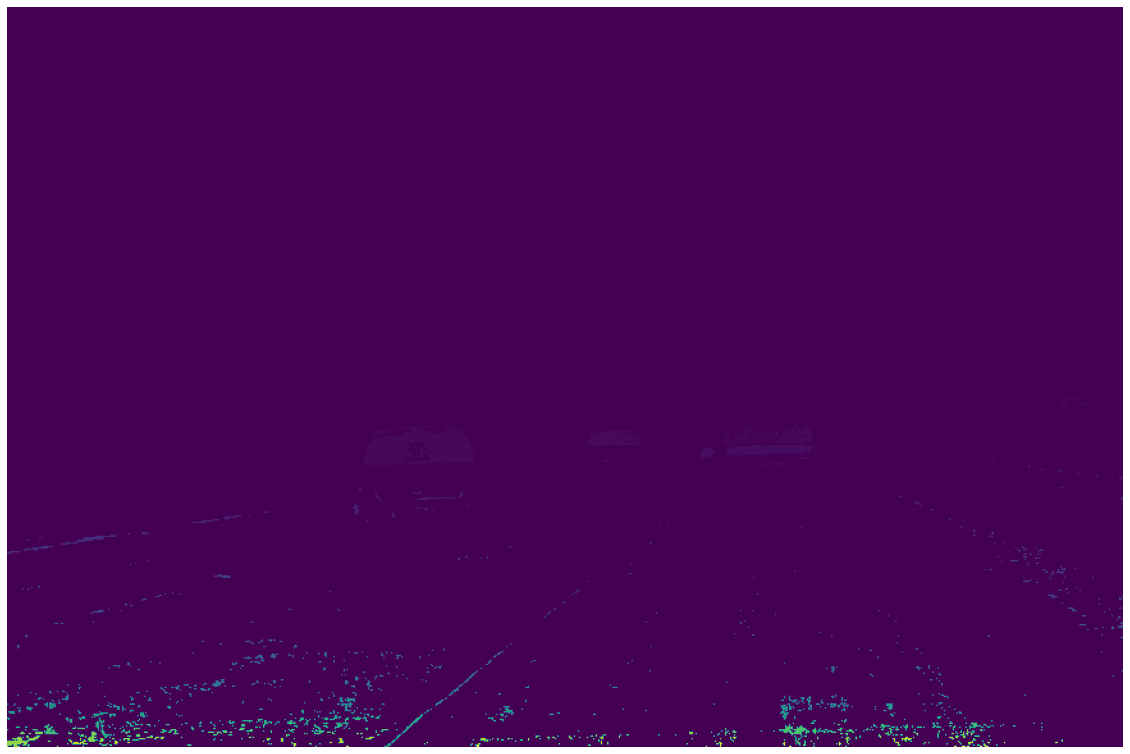

In [14]:
show_image(all_CCL_clustered_images[0], title = "CCL_image_cluster_1", convert_BGR2RGB=False)